In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
!pip install tensorflow
import tensorflow as tf 
import os 
import warnings
from tensorflow.keras.models import load_model

In [2]:
new_train_dir = r'C:\Users\afsha\Downloads\archive (2)\train'
new_test_dir = r'C:\Users\afsha\Downloads\archive (2)\test'
new_val_dir = r'C:\Users\afsha\Downloads\archive (2)\val'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 224, 224 
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    new_train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  
)

validation_generator = validation_datagen.flow_from_directory(
    new_val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    new_test_dir, 
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary' 
)

Found 8621 images belonging to 2 classes.
Found 5747 images belonging to 2 classes.
Found 2874 images belonging to 2 classes.


In [4]:


import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
   

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    model.save('custom_model')

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_1 (

INFO:tensorflow:Assets written to: custom_model\assets


In [5]:
img_width, img_height = 224, 224
batch_size = 32 

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    new_train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  
)

validation_generator = validation_datagen.flow_from_directory(
    new_val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    new_test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary' 
)

Found 8621 images belonging to 2 classes.
Found 5747 images belonging to 2 classes.
Found 2874 images belonging to 2 classes.


In [6]:
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=40,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),verbose=1,shuffle=True
    )

Epoch 1/40



270/270 [==============================] - 854s 3s/step - loss: 0.6121 - accuracy: 0.6899 - val_loss: 0.5785 - val_accuracy: 0.7028
Epoch 2/40
270/270 [==============================] - 814s 3s/step - loss: 0.5616 - accuracy: 0.7290 - val_loss: 0.5204 - val_accuracy: 0.7510
Epoch 3/40
270/270 [==============================] - 807s 3s/step - loss: 0.5310 - accuracy: 0.7515 - val_loss: 0.4869 - val_accuracy: 0.7745
Epoch 4/40
270/270 [==============================] - 1032s 4s/step - loss: 0.5024 - accuracy: 0.7642 - val_loss: 0.4633 - val_accuracy: 0.7820
Epoch 5/40
270/270 [==============================] - 873s 3s/step - loss: 0.4873 - accuracy: 0.7708 - val_loss: 0.4463 - val_accuracy: 0.7881
Epoch 6/40
270/270 [==============================] - 785s 3s/step - loss: 0.4761 - accuracy: 0.7772 - val_loss: 0.4404 - val_accuracy: 0.7962
Epoch 7/40
270/270 [==============================] - 1065s 4s/step - loss: 0.4623 - accuracy: 0.7846 - val_loss: 0.4386 - val_accuracy: 0.7922
Epoch 8/

In [7]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

90/90 [==============================] - 50s 559ms/step - loss: 0.2480 - accuracy: 0.8963
Test Loss: 0.24800869822502136, Test Accuracy: 0.8963117599487305


In [8]:
model.save('custom_model')

model = load_model('custom_model')

INFO:tensorflow:Assets written to: custom_model\assets


INFO:tensorflow:Assets written to: custom_model\assets


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
import numpy as np

def get_predictions_and_labels(model, generator):
    predictions = []
    true_labels = []
    for _ in range(len(generator)):
        images, labels = generator.next()
        batch_predictions = model.predict(images)
        predictions.extend(np.round(batch_predictions))
        true_labels.extend(labels)
    return np.array(predictions), np.array(true_labels)

train_predictions, train_labels = get_predictions_and_labels(model, train_generator)
validation_predictions, validation_labels = get_predictions_and_labels(model, validation_generator)
test_predictions, test_labels = get_predictions_and_labels(model, test_generator)

def print_metrics(predictions, true_labels, dataset_name):
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    auc = roc_auc_score(true_labels, predictions)

    print(f"Metrics for {dataset_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print()

print_metrics(train_predictions, train_labels, "Training Set")
print_metrics(validation_predictions, validation_labels, "Validation Set")
print_metrics(test_predictions, test_labels, "Test Set")

1/1 [==============================] - 0s 299ms/step
Metrics for Training Set:
Accuracy: 0.8910
Precision: 0.9020
Recall: 0.8050
F1 Score: 0.8507
AUC: 0.8750

Metrics for Validation Set:
Accuracy: 0.8999
Precision: 0.9250
Recall: 0.8048
F1 Score: 0.8607
AUC: 0.8821

Metrics for Test Set:
Accuracy: 0.8963
Precision: 0.9220
Recall: 0.8018
F1 Score: 0.8577
AUC: 0.8792



In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras import layers, models

img_width, img_height = 224, 224 
batch_size = 32 

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    new_train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    new_val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

strategy = tf.distribute.MirroredStrategy()

with strategy.scope():

    base_model = DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(img_width, img_height, 3)
)

    base_model.trainable = False

    model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

    initial_learning_rate = 0.0001

    model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy'])

    history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=40,
    validation_data=validation_generator,validation_steps=len(validation_generator),
)

# Evaluate the model on the test set
    test_generator = test_datagen.flow_from_directory(
    new_test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

    test_loss, test_accuracy = model.evaluate(test_generator)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Found 8621 images belonging to 2 classes.
Found 5747 images belonging to 2 classes.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


Epoch 1/40



270/270 [==============================] - 1211s 4s/step - loss: 0.5333 - accuracy: 0.7325 - val_loss: 0.4888 - val_accuracy: 0.7670
Epoch 2/40
270/270 [==============================] - 902s 3s/step - loss: 0.4910 - accuracy: 0.7656 - val_loss: 0.5249 - val_accuracy: 0.7571
Epoch 3/40
270/270 [==============================] - 714s 3s/step - loss: 0.4698 - accuracy: 0.7796 - val_loss: 0.4537 - val_accuracy: 0.7910
Epoch 4/40
270/270 [==============================] - 907s 3s/step - loss: 0.4574 - accuracy: 0.7838 - val_loss: 0.4561 - val_accuracy: 0.7900
Epoch 5/40
270/270 [==============================] - 814s 3s/step - loss: 0.4564 - accuracy: 0.7860 - val_loss: 0.4622 - val_accuracy: 0.7888
Epoch 6/40
270/270 [==============================] - 812s 3s/step - loss: 0.4545 - accuracy: 0.7881 - val_loss: 0.4369 - val_accuracy: 0.7952
Epoch 7/40
270/270 [==============================] - 699s 3s/step - loss: 0.4551 - accuracy: 0.7889 - val_loss: 0.4369 - val_accuracy: 0.7982
Epoch 8/4

In [11]:
model.save('custom_model')

custom_model = load_model('custom_model')

INFO:tensorflow:Assets written to: custom_model\assets


INFO:tensorflow:Assets written to: custom_model\assets


In [12]:
epochs = 40 
fine_tuning_epoch = 20
total_epoch = epochs + fine_tuning_epoch

In [13]:
base_model.trainable = True

try:
    for layer in base_model.layers[:200]:
        layer.trainable = False
except:
    print("Unable to freeze first 200 layers")

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss='binary_crossentropy', metrics=['accuracy'])

history_fine_tuning = model.fit(train_generator,
                                steps_per_epoch=len(train_generator),
                                epochs=total_epoch,
                                validation_data=validation_generator,
                                validation_steps=len(validation_generator),
                                verbose=1, shuffle=True,
                                initial_epoch=fine_tuning_epoch)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (  (None, 1920)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout_1 (Dropout)         (None, 1920)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               491776    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 18814017 (71.77 MB)
Trainable params: 16409089 (62.60 MB)
Non-trainable params: 2404928 (9.17 MB)
________

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
import numpy as np

def get_predictions_and_labels(model, generator):
    predictions = []
    true_labels = []
    
    for _ in range(len(generator)):
        images, labels = generator.next()
        batch_predictions = model.predict(images)
        
        predictions.extend(np.round(batch_predictions))  # Assuming a binary classification task
        true_labels.extend(labels)
    
    return np.array(predictions), np.array(true_labels)

train_predictions, train_labels = get_predictions_and_labels(model, train_generator)

validation_predictions, validation_labels = get_predictions_and_labels(model, validation_generator)

test_predictions, test_labels = get_predictions_and_labels(model, test_generator)

def print_metrics(predictions, true_labels, dataset_name):
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    auc = roc_auc_score(true_labels, predictions)

    print(f"Metrics for {dataset_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print()
    print()

print_metrics(train_predictions, train_labels, "Training Set")
print_metrics(validation_predictions, validation_labels, "Validation Set")
print_metrics(test_predictions, test_labels, "Test Set")

1/1 [==============================] - 2s 2s/step
Metrics for Training Set:
Accuracy: 0.9799
Precision: 0.9956
Recall: 0.9522
F1 Score: 0.9734
AUC: 0.9748


Metrics for Validation Set:
Accuracy: 0.9791
Precision: 0.9976
Recall: 0.9479
F1 Score: 0.9721
AUC: 0.9733


Metrics for Test Set:
Accuracy: 0.9743
Precision: 0.9971
Recall: 0.9366
F1 Score: 0.9659
AUC: 0.9674




In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing import image

# Assuming you have the model, true_labels, and predictions from the previous code

# Function to plot confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, classes):
    cm = confusion_matrix(true_labels, predicted_labels)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')

    plt.show()

# Function to plot ROC curve
def plot_roc_curve(true_labels, predicted_probs):
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

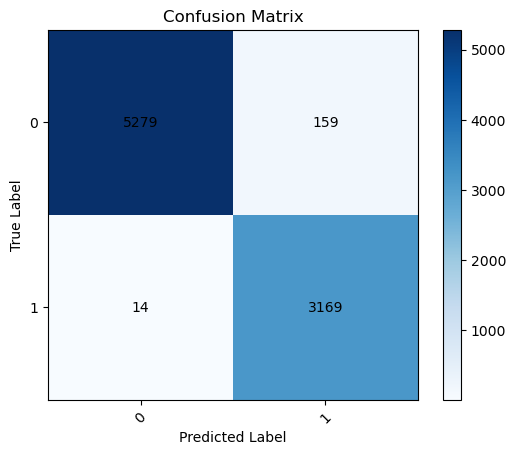

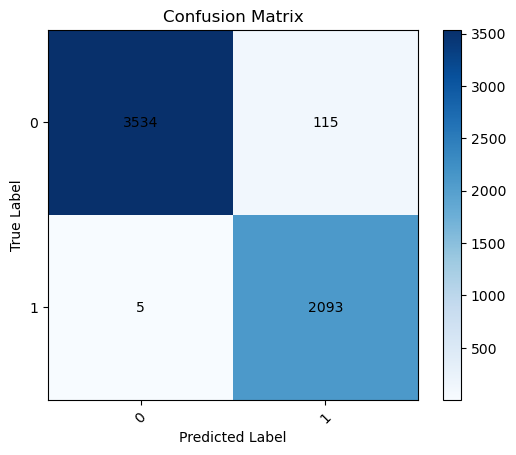

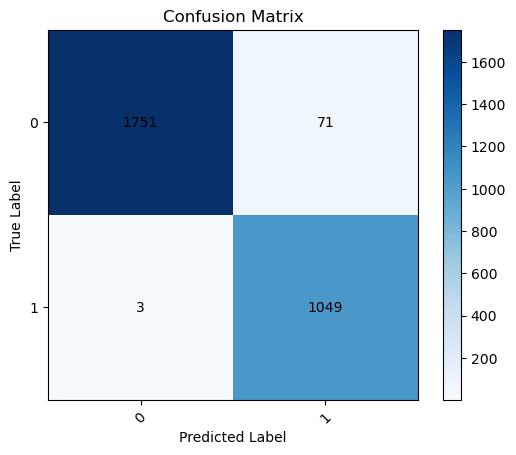

In [21]:
# Assuming binary classification (0 or 1)
classes = [0, 1]

# Visualize confusion matrices
plot_confusion_matrix(train_predictions, train_labels,  classes)
plot_confusion_matrix(validation_predictions, validation_labels, classes)
plot_confusion_matrix(test_predictions, test_labels, classes)

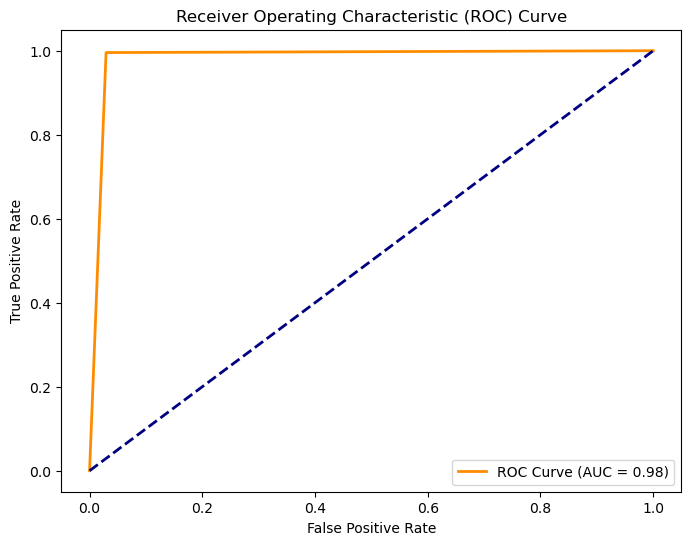

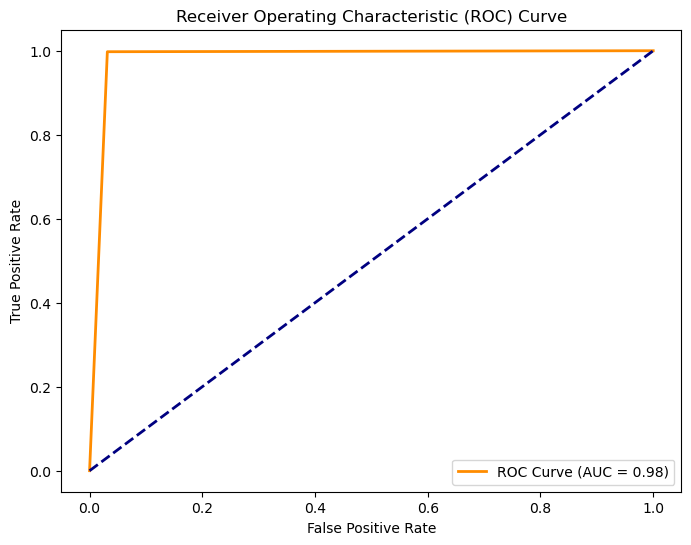

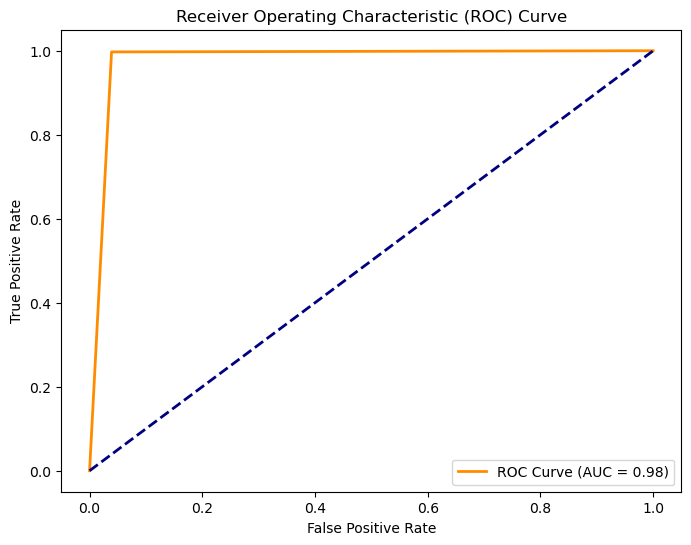

In [22]:
# Visualize ROC curves
plot_roc_curve(train_predictions, train_labels,)
plot_roc_curve(validation_predictions, validation_labels)
plot_roc_curve(test_predictions, test_labels)

In [23]:
from sklearn.metrics import classification_report

# Classification report for the Training Set
binary_train_predictions = np.round(train_predictions)

classification_report_train = classification_report(train_labels,binary_train_predictions)
print("Classification Report for Training Set:")
print(classification_report_train)

Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      5293
         1.0       1.00      0.95      0.97      3328

    accuracy                           0.98      8621
   macro avg       0.98      0.97      0.98      8621
weighted avg       0.98      0.98      0.98      8621



In [24]:
binary_val_predictions = np.round(validation_predictions)

# Classification report for the Validation Set
classification_report_validation = classification_report(validation_predictions, validation_labels)
print("\nClassification Report for Validation Set:")
print(classification_report_validation)


Classification Report for Validation Set:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      3649
         1.0       0.95      1.00      0.97      2098

    accuracy                           0.98      5747
   macro avg       0.97      0.98      0.98      5747
weighted avg       0.98      0.98      0.98      5747



In [25]:
binary_test_predictions = np.round(test_predictions)

# Classification report for the Test Set
classification_report_test = classification_report(test_predictions, test_labels)
print("\nClassification Report for Test Set:")
print(classification_report_test)


Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      1822
         1.0       0.94      1.00      0.97      1052

    accuracy                           0.97      2874
   macro avg       0.97      0.98      0.97      2874
weighted avg       0.98      0.97      0.97      2874

